# 3. Script for conducting sentiment analysis on comment corpora

## Set Up

In [38]:
import pandas as pd

In [39]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import comment data
reddit = pd.read_csv(path+'comments_reddit_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [40]:
display(reddit.head())
display(fb.head())

,comment_id,text
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO
1,gww5jfz,&gt; This means people will no longer be allow...
2,gww68ne,phase 2 lai liao wah shag
3,gww6icr,Government fucks up and takes it out on the po...
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...


,comment_id,text
0,10157877630867100,The opening up in early April was way too much...
1,10157877561317100,"Please ban India flights, India citizens India..."
2,10157877564117100,Haiz.. no apologies for importing cases. All y...
3,10157877557412100,Tighten local measures but fail to shut border...
4,10157877555032100,Blaming us for not following safe distancing m...


## Preprocessing text

### Replacing words/phrases according using self-built dictionary

In [41]:
# Import dictionary
dict_clean_df = pd.read_csv(path+'dict.csv', keep_default_na=False)
dict_clean = dict(dict_clean_df.values)

In [42]:
dict_clean

{'cb': '',
 'CB': '',
 'Cb': '',
 'ang moh': 'Caucasians',
 'Ang Moh': 'Caucasians',
 'sia suay': 'disgraceful',
 'Sia Suay': 'Disgraceful',
 'Sia suay': 'disgraceful',
 'SIA SUAY': 'DISGRACEFUL',
 'gov': 'government',
 'govt': 'government',
 'Gov': 'government',
 'Govt': 'Government',
 "gov't": 'government',
 "Gov't": 'Government',
 'ktv': 'karaoke',
 'KTV': 'karaoke',
 'kTV': 'karaoke',
 'ktvs': 'karaoke',
 'KTVs': 'karaoke',
 'Ktvs': 'karaoke',
 'ppl': 'people',
 'sg': 'Singapore',
 'SG': 'Singapore',
 'mrt': 'subway',
 'MRT': 'subway',
 'Mrt': 'subway',
 'icu': 'Intensive Care Unit',
 'ICU': 'Intensive Care Unit',
 'pls': 'please',
 'PLS': 'please',
 'WFH': 'Work From Home',
 'wfh': 'Work From Home',
 'Wfh': 'Work From Home',
 'hbl': 'Home-Based Learning',
 'HBL': 'Home-Based Learning',
 'Hbl': 'Home-Based Learning',
 'PM': 'Prime Minister',
 'pm': 'Prime Minister',
 'Pm ': 'Prime Minister',
 'MTF': 'Ministry Task Force',
 'mtf': 'Ministry Task Force',
 'Mtf': 'Ministry Task Force'

In [43]:
# Function for replacing text using dictionary mapping
def replace_text(text):
    import re
    for orig, new in dict_clean.items():
        text = re.sub(r'\b{}\b'.format(orig), new, text)
    return(text)

In [44]:
# Apply function to FB and Reddit DataFrames
reddit['text_replaced'] = reddit.text.apply(replace_text)
fb['text_replaced'] = fb.text.apply(replace_text)

In [45]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_replaced
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...


,comment_id,text,text_replaced
0,10157877630867100,The opening up in early April was way too much...,The opening up in early April was way too much...
1,10157877561317100,"Please ban India flights, India citizens India...","Please ban India flights, India citizens India..."
2,10157877564117100,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...
3,10157877557412100,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...
4,10157877555032100,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...


### Clean text

In [46]:
# Function for cleaning text
def clean_text_sa(text):
    import re
    import html
    text1 = html.unescape(text) # remove HTML encoded characters
    text2 = text1.replace('[removed]', '') # remove Reddit removed comments
    text3 = text2.replace('[deleted]', '') # remove Reddit deleted comments
    text4 = re.sub(r'\n', ' ', text3) # replace line breaks with spaces
    text5 = re.sub(r'#\S+', '', text4) # remove hashtags
    text6 = re.sub(r'http\S+', '', text5) # remove links starting with http
    text7 = re.sub(r'\S+\.com\S+', '', text6) # remove links not starting with http
    return(text7)

In [47]:
# Apply function to DataFrames
reddit['text_clean_sa'] = reddit.text_replaced.apply(clean_text_sa)
fb['text_clean_sa'] = fb.text_replaced.apply(clean_text_sa)

In [48]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_replaced,text_clean_sa
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...


,comment_id,text,text_replaced,text_clean_sa
0,10157877630867100,The opening up in early April was way too much...,The opening up in early April was way too much...,The opening up in early April was way too much...
1,10157877561317100,"Please ban India flights, India citizens India...","Please ban India flights, India citizens India...","Please ban India flights, India citizens India..."
2,10157877564117100,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...
3,10157877557412100,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...
4,10157877555032100,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...


In [49]:
# Export cleaned text corpora to CSV
reddit.to_csv(path+'comments_reddit_all_clean.csv', header=True, index=True)
fb.to_csv(path+'comments_fb_all_clean.csv', header=True, index=True)

## Sentiment analysis 

### VADER

In [50]:
# Define function for scoring sentiment using VADER
def score_vader(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    return(score) 

In [51]:
# Apply function to DataFrames
reddit['score_vader'] = reddit.text_clean_sa.apply(score_vader)
fb['score_vader'] = fb.text_clean_sa.apply(score_vader)

In [52]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_replaced,text_clean_sa,score_vader
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO,-0.2960
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,-0.2462
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired,-0.4404
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772


,comment_id,text,text_replaced,text_clean_sa,score_vader
0,10157877630867100,The opening up in early April was way too much...,The opening up in early April was way too much...,The opening up in early April was way too much...,0.0000
1,10157877561317100,"Please ban India flights, India citizens India...","Please ban India flights, India citizens India...","Please ban India flights, India citizens India...",-0.7044
2,10157877564117100,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,0.3382
3,10157877557412100,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,-0.8805
4,10157877555032100,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,-0.8319


### TextBlob

In [53]:
# Define function for scoring sentiment using TextBlob
def score_tb(text):
    from textblob import TextBlob
    score = TextBlob(text).sentiment.polarity
    return(score)

In [54]:
# Apply function to DataFrames
reddit['score_tb'] = reddit.text_clean_sa.apply(score_tb)
fb['score_tb'] = fb.text_clean_sa.apply(score_tb)

In [55]:
# Inspect DataFrames
display(reddit.head())
display(fb.head())

,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000


,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb
0,10157877630867100,The opening up in early April was way too much...,The opening up in early April was way too much...,The opening up in early April was way too much...,0.0000,0.000000
1,10157877561317100,"Please ban India flights, India citizens India...","Please ban India flights, India citizens India...","Please ban India flights, India citizens India...",-0.7044,0.047917
2,10157877564117100,Haiz.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,Sigh.. no apologies for importing cases. All y...,0.3382,0.468750
3,10157877557412100,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,Tighten local measures but fail to shut border...,-0.8805,-0.125000
4,10157877555032100,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,Blaming us for not following safe distancing m...,-0.8319,0.250000


In [56]:
# Export text corpora with scores to CSV
reddit.to_csv(path+'comments_reddit_all_score.csv', header=True, index=True)
fb.to_csv(path+'comments_fb_all_score.csv', header=True, index=True)

## Evaluating sentiment analysis algorithms

To evaluate how well the algorithms have done in analysing the sentiment of each comment, we will generate word clouds for each algorithm and each polarity to see if the algorithms have indeed succeeded in detecting positive and negative sentiment accurately.

In [57]:
# Import text corpora with scores
reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)

In [58]:
# Concatenate Reddit and FB score data into one DataFrame 
all_score = pd.concat([reddit, fb], ignore_index=True)
display(all_score.head())
display(all_score.tail())
display(all_score.shape)

,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,-0.2462,0.208333
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired,-0.4404,-0.400000
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000


,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb
16490,10158186215552100,Trying very hard to push that all singaporeans...,Trying very hard to push that all singaporeans...,Trying very hard to push that all singaporeans...,-0.5095,-0.189583
16491,10158186213932100,Omg. This is real bad. And really bad foresigh...,Omg. This is real bad. And really bad foresigh...,Omg. This is real bad. And really bad foresigh...,-0.8357,-0.087500
16492,10158186213787100,"Endemic ma, didnt they know this?","Endemic ma, didnt they know this?","Endemic ma, didnt they know this?",0.0000,0.000000
16493,10158186211122100,"If healthcare system is overstretched, why you...","If healthcare system is overstretched, why you...","If healthcare system is overstretched, why you...",-0.5962,0.125000
16494,10158186210967100,Overwhelmed by antivaxxers,Overwhelmed by people against vaccination,Overwhelmed by people against vaccination,0.0516,0.000000


(16495, 6)

### Preprocessing text
To generate the word cloud, we will need to remove digits, punctuation and stop words (previously retained for sentiment analysis purposes) in order to get the most meaningful and frequently used words associated with each polarity. We also need to remove domain-specific phrases and proper nouns

In [59]:
# Function for cleaning text
def clean_text_wc(text):
    import re
    text_clean = re.sub(r'[^A-Za-z\'\"]+', ' ', text).strip().lower() 
    return(text_clean)

In [60]:
# Function for removing stop words
def remove_sw(text):
    from nltk.corpus import stopwords
    sw = set(stopwords.words('English'))
    text_filtered = [word for word in text.split() if not word in sw] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [61]:
# Domain-specific phrases to remove
domain = ['ministry of health', 'intensive care unit', 'multi-ministry task force', 
         'ong ye kung', 'ong', 'ye', 'kung', 'lawrence wong', 'home-based learning', 'work from home', 'ministry of education',
         'chinese new year', 'tan tock seng hospital', 'stay home notice', 'vaccinated travel lane',
         'people\'s action party', 'vaccine', 'vaccination', 'vaccinated', 'unvaccinated', 'people against vaccination',
         'comprehensive economic cooperation agreement', 'government', 'chan chun sing', 'ministry of manpower', 'national day parade',
         'immigrations and checkpoints authority', 'polymerase chain reaction test', 'lee hsien loong', 'safe management measures',
         'safe distancing ambassador', 'healthcare', 'healthcare worker', 'covid', 'coronavirus', 'virus', 'hospital', 'singapore',
         'circuit breaker', 'lockdowns', 'lockdown', 'phase', 'roadmap', 'case', 'cases', 'ministry', 'karaoke', 'local']

In [62]:
# Function for removing domain-specific phrases 
def remove_domain(text):
    import re
    for phrase in domain:
        text = re.sub(r'\b{}\b'.format(phrase), ' ', text).strip()
    return(text)

In [63]:
# Apply functions to DataFrame
all_score['text_clean_wc'] = all_score.text_clean_sa.apply(clean_text_wc)
all_score['text_filtered'] = all_score.text_clean_wc.apply(remove_sw)
all_score['text_filtered'] = all_score.text_filtered.apply(remove_domain)

In [64]:
# Inspect DataFrame
all_score.head()

,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,-0.2462,0.208333,this means people will no longer be allowed to...,means people longer allowed digitally check sc...
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai liao wah tired
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444,government fucks up and takes it out on the po...,fucks takes population changes workplaces obvi...
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000,gyms also closed till th pepehands i just want...,gyms also closed till th pepehands want rock c...


### Generate word clouds 

In [65]:
# Function to generate word cloud
def wordcloud(algo='vader', polarity='pos'):
    all_algo = all_score[['comment_id', 'text_filtered', 'score_{}'.format(algo)]]
    
    if polarity == 'pos':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]>0]
    elif polarity == 'neg':
        all_algo_polarity = all_algo[all_algo['score_{}'.format(algo)]<0]
    else:
        None
    
    cloud_string = ' '.join(all_algo_polarity['text_filtered']) 
    
    from wordcloud import WordCloud
    cloud = WordCloud().generate(cloud_string)
    return(cloud)

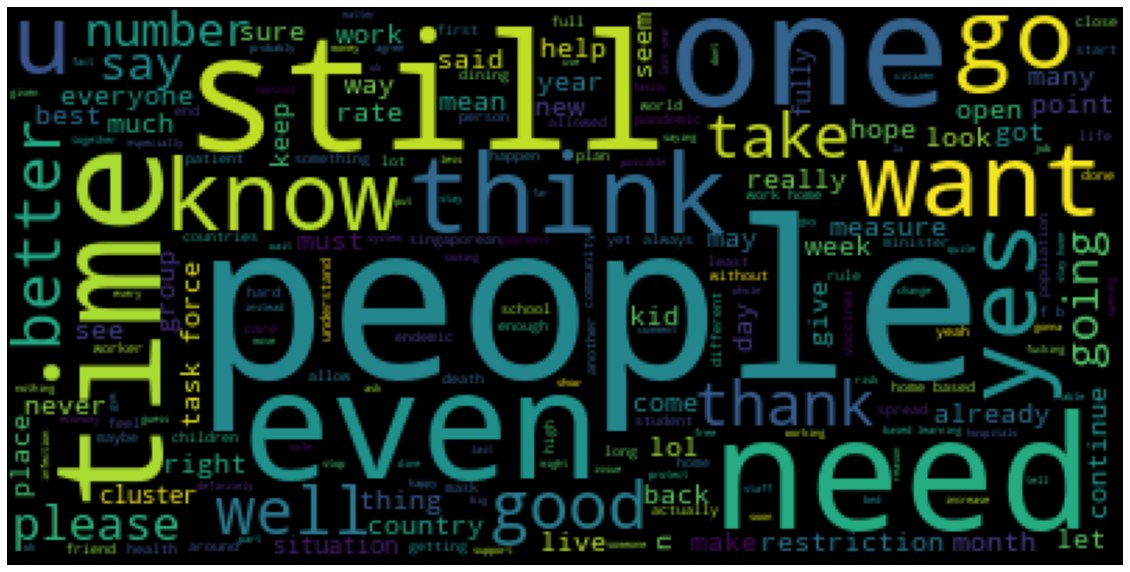

In [66]:
# Generate single word cloud
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud('vader', 'pos'))
plt.axis('off')
plt.show()

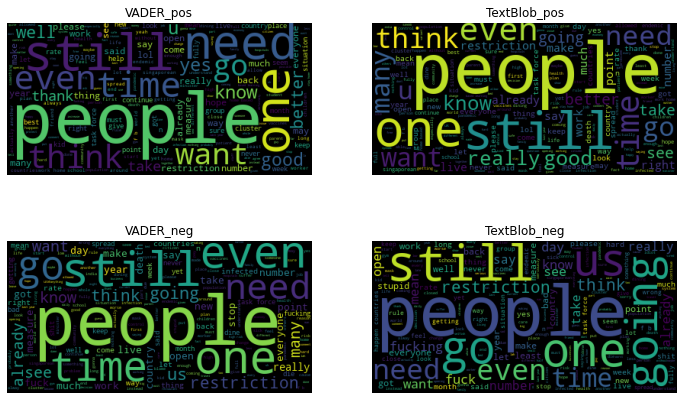

In [67]:
# Generate word clouds into one figure and exporting as PNG
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all.png', bbox_inches='tight')
plt.show() 

From the above, we can see that there are a lot of common words that are repeated across the word clouds and do not bear any sentiment. To produce more meaningful word clouds, I will remove non-sentiment bearing tokens among the top 300 tokens.

### Generating word clouds after removing non sentiment-bearing words

In [68]:
# Import top 1000 tokens in corpora
tokens_all_top1000 = pd.read_csv(path+'comments_all_tokens_top1000.csv', index_col=0)

In [69]:
# Inspect top 300 tokens
tokens_all_top300 = tokens_all_top1000['token'][0:300].tolist()
print(tokens_all_top300)

['people', 'covid', 'like', 'cases', 'still', 'vaccinated', 'get', 'go', 'one', 'even', 'time', 'also', 'singapore', 'need', 'us', 'back', 'think', 'going', 'open', 'government', 'would', 'vaccination', 'see', 'many', 'know', 'want', 'take', 'well', 'restrictions', 'virus', 'good', 'really', 'home', 'already', 'said', 'year', 'everyone', 'measures', 'say', 'u', 'make', 'work', 'much', 'country', 'better', 'got', 'new', 'day', 'close', 'cb', 'point', 'let', 'last', 'keep', 'vaccine', 'right', 'lockdown', 'risk', 'come', 'countries', 'way', 'please', 'never', 'stay', 'ktv', 'end', 'since', 'may', 'safe', 'govt', 'long', 'can', 'not', 'next', 'high', 'n', 'dine', 'case', 'fully', 'endemic', 'stop', 'first', 'phase', 'world', 'spread', 'yet', 'b', 'situation', 'care', 'sg', 'weeks', 'sure', 'rate', 'population', 'life', 'must', 'school', 'getting', 'live', 'hope', 'group', 'lol', 'health', 'f', 'another', 'icu', 'na', 'numbers', 'give', 'look', 'every', 'public', 'done', 'two', 'mask', 'en

Among the top 300 tokens, we can see that apart from some sentiment-bearing tokens (e.g. 'good', 'better', 'sure') the rest are not as meaningful and so can be removed. I will create a list of tokens to keep among these tokens and remove the remaining as stop words.

In [85]:
tokens_keep = ['good', 'better', 'safe', 'hope', 'infected', 'enough', 
               'fucking', 'die', 'bad', 'hard', 'thanks', 'help', 
               'best', 'fuck', 'shit', 'big', 'thank', 'normal',
               'stupid', 'wrong', 'problem', 'blame', 'suffer']

tokens_sw_top = [t for t in tokens_all_top300 if t not in tokens_keep]

In [86]:
# Function for removing top occuring tokens
def remove_sw_top(text):
    text_filtered = [word for word in text.split() if not word in tokens_sw_top] 
    text_filtered = ' '.join(text_filtered) 
    return(text_filtered)

In [87]:
# Apply functions to DataFrame
all_score['text_filtered'] = all_score.text_filtered.apply(remove_sw_top)
display(all_score.head())

,comment_id,text,text_replaced,text_clean_sa,score_vader,score_tb,text_clean_wc,text_filtered
0,gww5drd,ALL MY PLANS ARE GONE NOOOOOOOO,ALL MY PLANS ARE GONE NO,ALL MY PLANS ARE GONE NO,-0.2960,0.000000,all my plans are gone no,plans gone
1,gww5jfz,&gt; This means people will no longer be allow...,&gt; This means people will no longer be allow...,> This means people will no longer be allowed ...,-0.2462,0.208333,this means people will no longer be allowed to...,longer digitally check scanning venue's safeen...
2,gww68ne,phase 2 lai liao wah shag,phase 2 lai liao wah tired,phase 2 lai liao wah tired,-0.4404,-0.400000,phase lai liao wah tired,lai liao wah tired
3,gww6icr,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,Government fucks up and takes it out on the po...,-0.9668,-0.244444,government fucks up and takes it out on the po...,fucks takes changes workplaces obviously gets ...
4,gww6luf,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,Gyms also closed till 30th. PepeHands. I just ...,0.0772,-0.100000,gyms also closed till th pepehands i just want...,gyms th pepehands rock climb


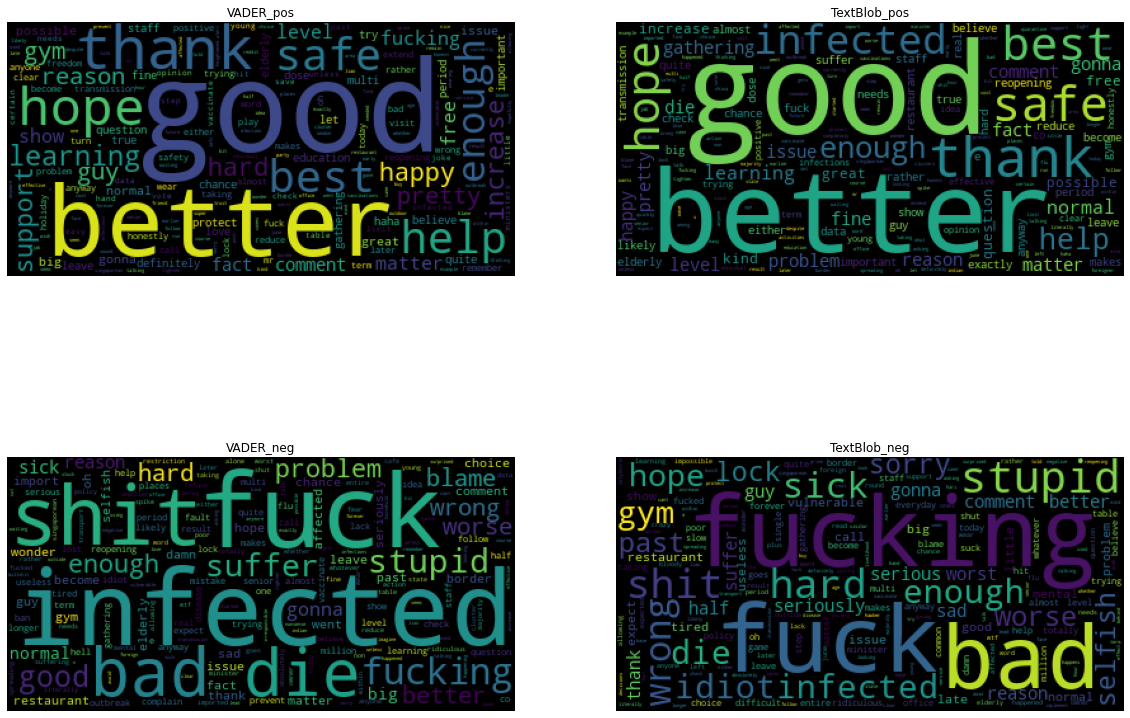

In [88]:
# Generating new word clouds and exporting as PNG
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20, 16))
plt.subplots_adjust(hspace=0)

row = 0 
col = 0 
cloud_list = [wordcloud('vader', 'pos'), wordcloud('vader', 'neg'), wordcloud('tb', 'pos'), wordcloud('tb', 'neg')]
labels_list = ['VADER_pos', 'VADER_neg', 'TextBlob_pos', 'TextBlob_neg']

for i in range(0,4):
    cloud = cloud_list[i]
    ax[row][col].imshow(cloud)
    ax[row][col].axis('off')
    ax[row][col].title.set_text(labels_list[i])
    row = row+1
    if row == rows:
        row = 0
        col = col+1

plt.savefig(f'../data/wordcloud_all_remove_sw.png', bbox_inches='tight')
plt.show() 

From the word clouds, VADER and TextBlob both seem to generally capture the positive and negative sentiments adequately. There are some exceptions - for instance, VADER picks up on 'good' and TextBlob picks up on 'better' even for negatively-scored comments, while VADER picks up on 'fucking' and TextBlob picks up on 'infected' for positively-scored comments. Nonetheless, it is premature to conclude from the word clouds alone whether VADER or TextBlob is a more accurate sentiment analyser, as the word clouds only show the highest frequency words in each corpora without contextual clues. All we can conclude is that both algorithms are generally reliable and the output polarity scores from both algorithms can be used for further analysis.

In [89]:
# Export cleaned corpora to CSV
all_score.to_csv(path+'comments_all_clean_wc.csv', header=True, index=True)